In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.drop(columns=["Serial No."], inplace=True)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(7, activation="relu", input_dim=7))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="linear"))

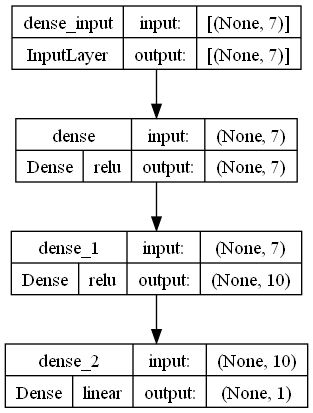

In [19]:
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 10)                80        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="mean_squared_error", optimizer="Adam")

In [14]:
history = model.fit(X_train_scaled, y_train, epochs=1000, validation_split=0.2)

Epoch 1/1000
2/2 [==============================] - 1s 185ms/step - loss: 0.3806 - val_loss: 0.4894
Epoch 2/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.3567 - val_loss: 0.4565
Epoch 3/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.3351 - val_loss: 0.4260
Epoch 4/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.3150 - val_loss: 0.3982
Epoch 5/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.2958 - val_loss: 0.3733
Epoch 6/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.2775 - val_loss: 0.3496
Epoch 7/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.2607 - val_loss: 0.3270
Epoch 8/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.2453 - val_loss: 0.3075
Epoch 9/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.2309 - val_loss: 0.2888
Epoch 10/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.2171 - val_loss: 0.2710
Epoch 11

In [15]:
y_pred = model.predict(X_test_scaled)

10/10 [==============================] - 0s 2ms/step


In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7382891552663304

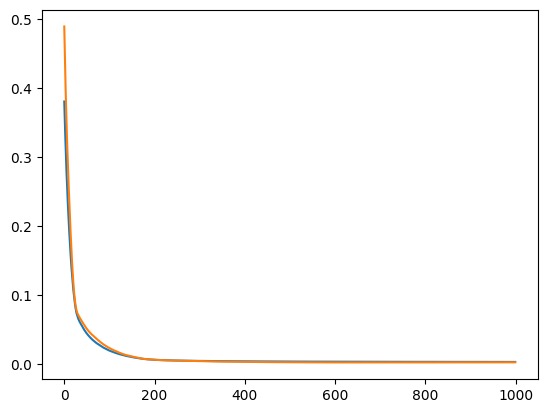

In [17]:

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])